<a href="https://colab.research.google.com/github/Eaint-shin/MMDT_2025_MLAI101/blob/Aint-Kyi-Phyu-Shin/Aint%20Kyi%20Phyu%20Shin/mid-term_project/Multiple_Linear_Regression_Model.ipynp" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#importing
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#importing csv file
df = pd.read_csv("sample_data/salary_prediction_data.csv")
df = df.dropna()
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [41]:
#Separating features and target
X = df.drop('Salary', axis=1)
Y = df['Salary']

#Defining categories
numerical_features = ['Experience', 'Age']
categorical_features = ['Education', 'Location', 'Job_Title', 'Gender']

#Preprocessing

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])



In [42]:
#Building pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Fitting Model
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)



In [43]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
Y_train_pred = pipeline.predict(X_train)
Y_test_pred = pipeline.predict(X_test)

train_r2 = r2_score(Y_train, Y_train_pred)
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)

test_r2 = r2_score(Y_test, Y_test_pred)
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
mean_salary = df['Salary'].mean()
print("Mean Salary:", mean_salary)
print("train_r2:",train_r2,"train_mae;",train_mae,"train_mse:",train_mse)
print("test_r2:",test_r2,"test_mae;",test_mae,"test_mse:",test_mse)




Mean Salary: 105558.40423878128
train_r2: 0.8789616062784484 train_mae; 7743.108408685911 train_mse: 95938381.42943813
test_r2: 0.8701863681609701 test_mae; 8157.898478643172 test_mse: 105996277.66096874


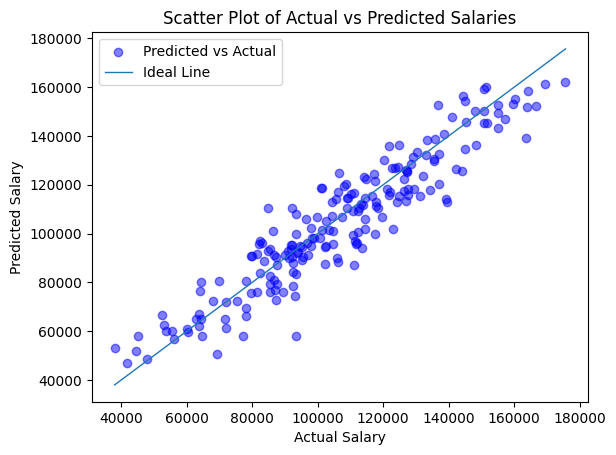

In [44]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted Salary
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],lw=1
         , label="Ideal Line")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Scatter Plot of Actual vs Predicted Salaries")
plt.legend()
plt.show()